In [1]:
#new new again
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mydata=pd.read_excel('/content/sample_data/PM25_Province.xlsx',index_col='DATE'   ,parse_dates=True)
mydata=mydata.dropna()
print('Shape of data',mydata.shape)
mydata.head()
mydata

Shape of data (106, 1)


,PM25
DATE,
2024-01-01,39.605022
2024-01-02,40.076325
2024-01-03,39.845128
2024-01-04,45.057174
2024-01-05,41.106817
...,...
2024-04-11,67.232874
2024-04-12,22.432018
2024-04-13,18.172767


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2024-01-01 to 2024-04-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    106 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


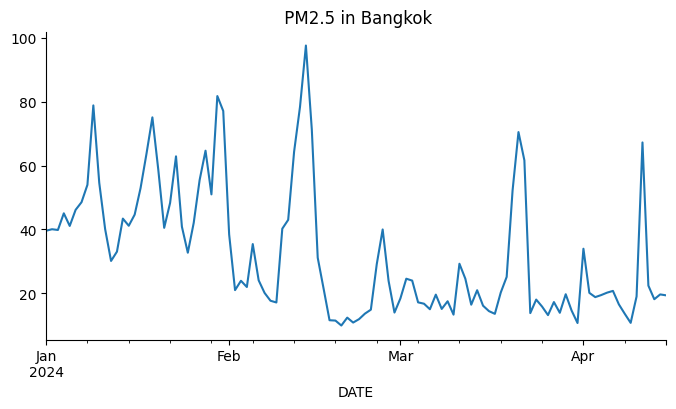

In [4]:
# @title  PM25

from matplotlib import pyplot as plt
mydata['PM25'].plot(kind='line', figsize=(8, 4), title=' PM2.5 in Bangkok')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
pip install statsmodels

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [7]:
adf_test(mydata['PM25'])

1. ADF :  -4.207228904158866
2. P-Value :  0.0006405789475442787
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 104
5. Critical Values :
	 1% :  -3.4948504603223145
	 5% :  -2.889758398668639
	 10% :  -2.5818220155325444


In [8]:
pip install pmdarima

In [9]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [10]:
stepwise_fit = auto_arima(mydata['PM25'],
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  106
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -427.787
Date:                Tue, 16 Apr 2024   AIC                            857.573
Time:                        05:31:52   BIC                            860.227
Sample:                    01-01-2024   HQIC                           858.649
                         - 04-15-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       202.4540     18.359     11.027      0.000     166.471     238.437
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                33.38
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -0.45
Prob(H) (two-sided):                  0.47   Kurtosis:                         5.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [12]:
print(mydata.shape)
train=mydata.iloc[:-30]
test=mydata.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(106, 1)
(76, 1) (30, 1)
PM25    13.59903
Name: 2024-03-17 00:00:00, dtype: float64 PM25    19.387225
Name: 2024-04-15 00:00:00, dtype: float64


In [13]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train.PM25, order=(0, 1, 0))
model_fit=model.fit()


<Axes: xlabel='DATE'>

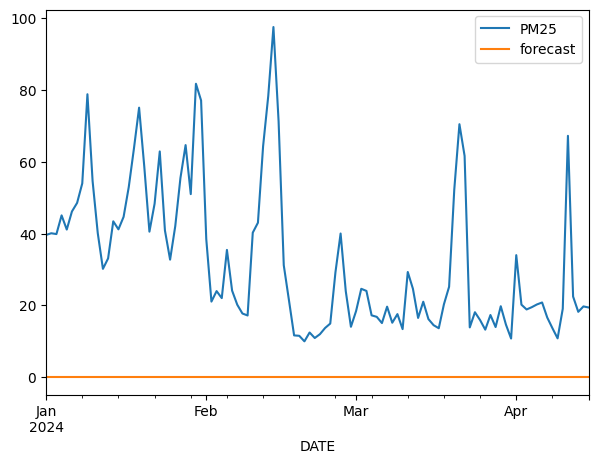

In [14]:
mydata['forecast']=model_fit.predict(start='2024-01-01',end='2024-04-15',dynamic=True)
mydata[['PM25','forecast']].plot(figsize=(7,5))

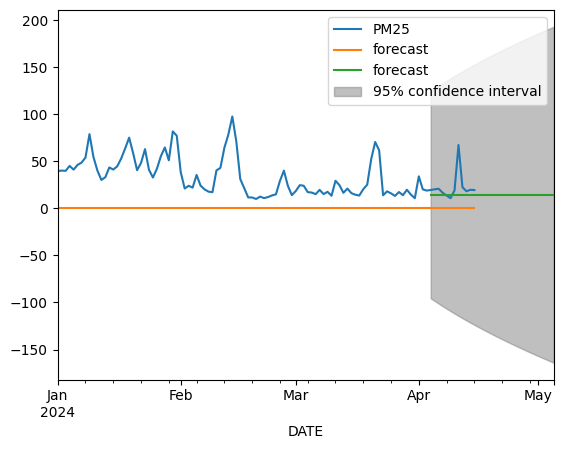

In [15]:
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = mydata.loc['2024-01-01':].plot(ax=ax)
plot_predict(model_fit, '2024-04-04', '2024-05-05', ax=ax)
plt.show()

In [16]:
y_forecast = test['PM25'].mean()
y_forecast

24.031522401